This is a Linear Regression model building from the scratch.

In [2]:
!pip install numpy pandas scikit-learn matplotlib



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Here is the Linear Regression Model class with training and predicting functions with given data X and y.

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate, num_itiration):
        self.learning_rate = learning_rate
        self.num_itiration = num_itiration
        self.weight = None
        self.bias = None

    def train(self, X,y):

        # Convert X and y to numpy array
        # X = np.array(X)
        # y = np.array(y)
        
        num_samples, num_features = X.shape
        self.weight = np.zeros(num_features)
        self.bias =0 
        X_transposed = np.transpose(X) 
        
        for i in range(self.num_itiration):
            y_pred = np.dot(X, self.weight) + self.bias
            dw = (2/num_samples) * np.dot(X_transposed,(y_pred-y))
            db = (2/num_samples) * np.sum(y_pred-y)

            self.weight= self.weight - (self.learning_rate * dw)
            self.bias = self.bias - (self.learning_rate * db)
            
    def predict(self, X):
        y_pred = np.dot(X, self.weight) + self.bias
        return y_pred

use the above class for training the model and predicting values.

In [ ]:
dataset = pd.read_csv("insurance.csv")
dataset.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Apply one-hot encoding to the 'region' and 'sex' columns
encoded_region = pd.get_dummies(dataset["region"], prefix="region").astype(int)
encoded_sex = pd.get_dummies(dataset["sex"], prefix="sex").astype(int)
encoded_smoker = pd.get_dummies(dataset["smoker"], prefix="smoker").astype(int)

# Concatenate the encoded columns back to the dataset
dataset = pd.concat([dataset, encoded_region, encoded_sex, encoded_smoker], axis=1)

#  drop the original 'region' and 'sex' columns if needed
dataset = dataset.drop(columns=["region", "sex", "smoker"])

# Display the updated dataset
print(dataset.head())


   age     bmi  children      charges  region_northeast  region_northwest  \
0   19  27.900         0  16884.92400                 0                 0   
1   18  33.770         1   1725.55230                 0                 0   
2   28  33.000         3   4449.46200                 0                 0   
3   33  22.705         0  21984.47061                 0                 1   
4   32  28.880         0   3866.85520                 0                 1   

   region_southeast  region_southwest  sex_female  sex_male  smoker_no  \
0                 0                 1           1         0          0   
1                 1                 0           0         1          1   
2                 1                 0           0         1          1   
3                 0                 0           0         1          1   
4                 0                 0           0         1          1   

   smoker_yes  
0           1  
1           0  
2           0  
3           0  
4           

In [ ]:
dataset.dtypes
dataset.isna().sum()

age                 0
bmi                 0
children            0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
dtype: int64

In [ ]:
dataset = dataset.astype(float)


<Figure size 640x480 with 0 Axes>

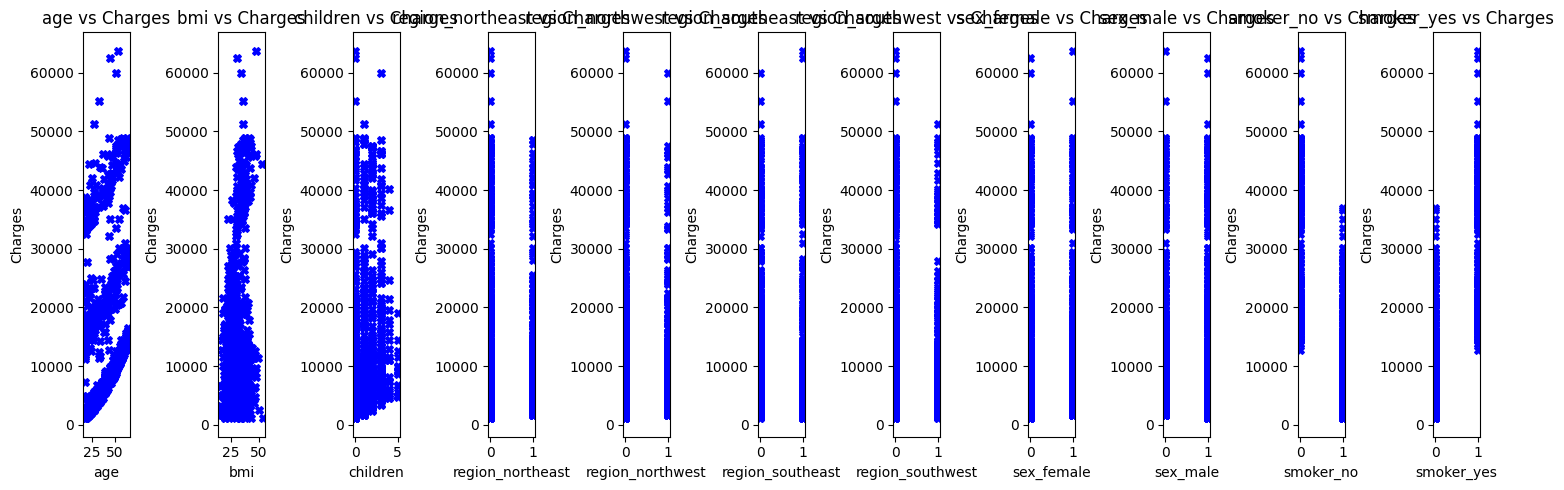

In [ ]:

X = dataset.drop(columns = "charges")
y = dataset["charges"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)


In [ ]:
model = LinearRegression(learning_rate=0.0001, num_itiration=1000)
model.train(X_train, y_train)


In [ ]:
prediction = model.predict(X_test)

In [ ]:
def mse(y_test, predictions):
    mse_val =  np.mean((y_test-predictions)**2)
    return mse_val


In [ ]:
mse_value = mse(y_test, prediction)
print(mse_value)

129124346.56134458


In [ ]:
!git status


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Linear_Regression_Model.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add .


In [ ]:
!git commit -m "Created Linear regression model and train"

[main 1f3cd8e] Created Linear regression model and train
 5 files changed, 1972 insertions(+)
 create mode 100644 .ipynb_checkpoints/Linear_Regression_Model-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/insurance-checkpoint.csv
 create mode 100644 .ipynb_checkpoints/pythoncode-checkpoint.ipynb
 create mode 100644 Linear_Regression_Model.ipynb
 delete mode 100644 pythoncode.py


In [ ]:
!git push

To github.com:meluxmeme/medical_cost_prediction.git
   9609180..1f3cd8e  main -> main
